<html>
<div>
  <img src="https://www.engineersgarage.com/wp-content/uploads/2021/11/TCH36-01-scaled.jpg" width=360px width=auto style="vertical-align: middle;">
  <span style="font-family: Georgia; font-size:30px; color: white;"> <br/> University of Tehran <br/> AI_CA2 <br/> Spring 02 </span>
</div>
<span style="font-family: Georgia; font-size:15pt; color: white; vertical-align: middle;"> low_mist - std id: 810100186 </span>
</html>

In this notebook we are to learn about Naïve bayes and how we can use it to classify. We are given a dataset of pictures and we have to determine which number each picture corresponds.

Digit (Individual Class) Accuracy of the Samples:
  Digit  Digit Accuracy
0     0        0.957843
1     1        0.962963
2     2        0.763023
3     3        0.754319
4     4        0.661339
5     5        0.673333
6     6        0.927105
7     7        0.843750
8     8        0.727919
9     9        0.863974
Overall Accuracy of Naive Bayes Model: 0.8041


Text(195.72222222222223, 0.5, 'Predicted class value')

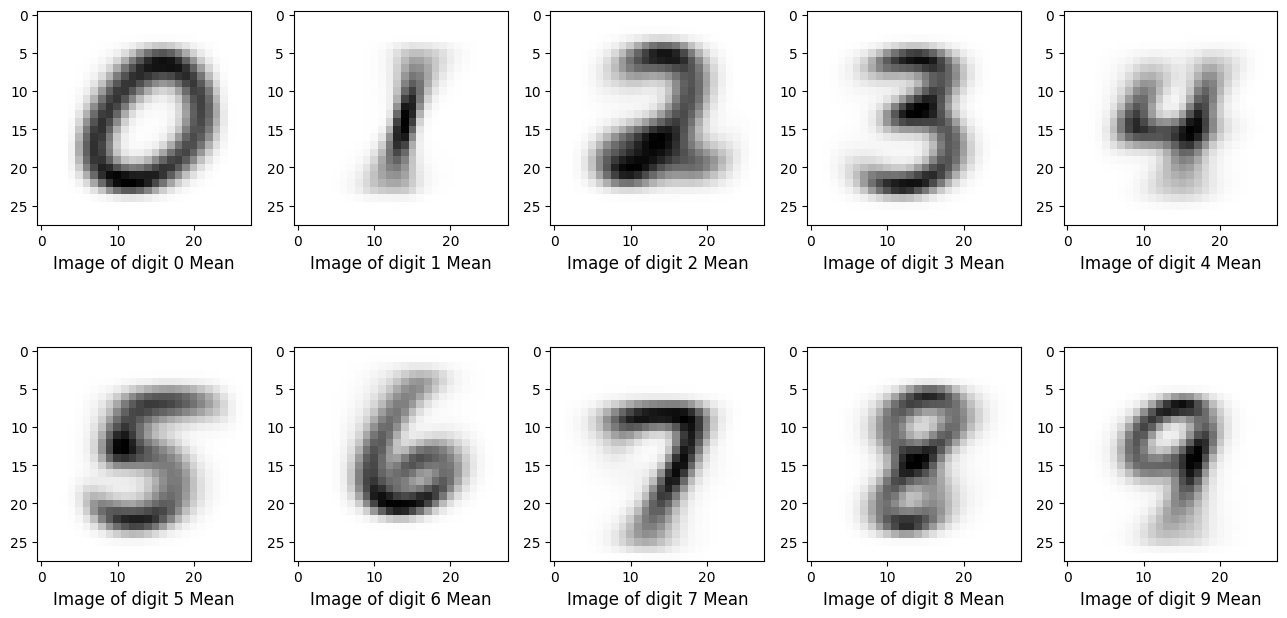

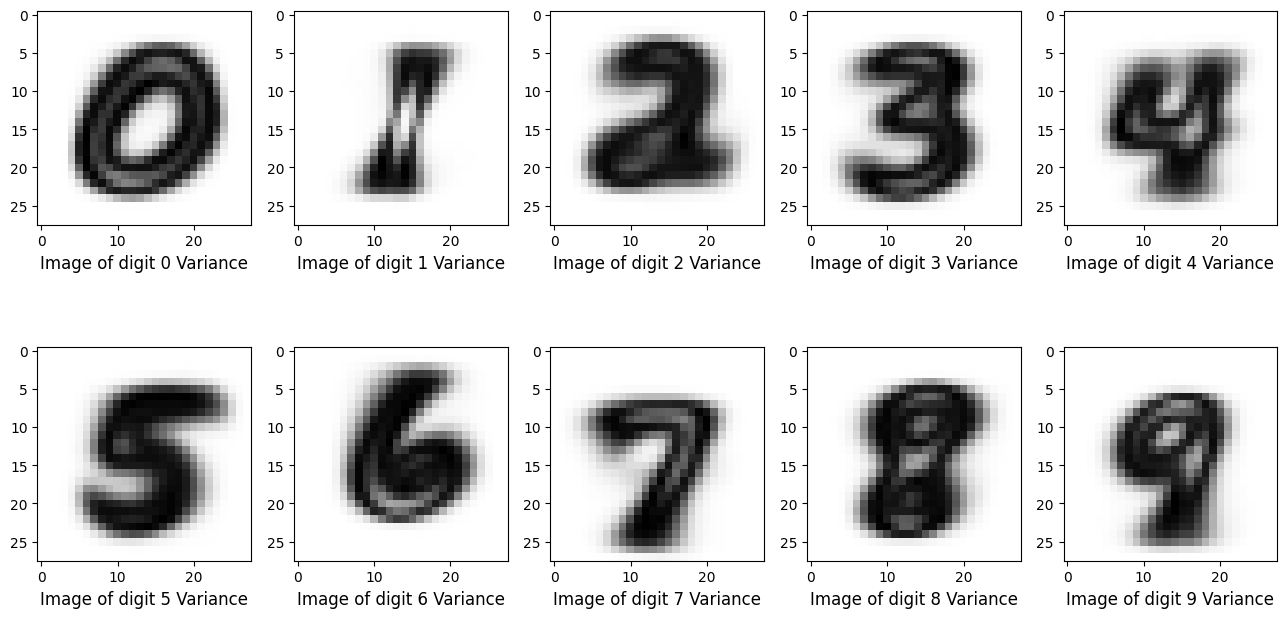

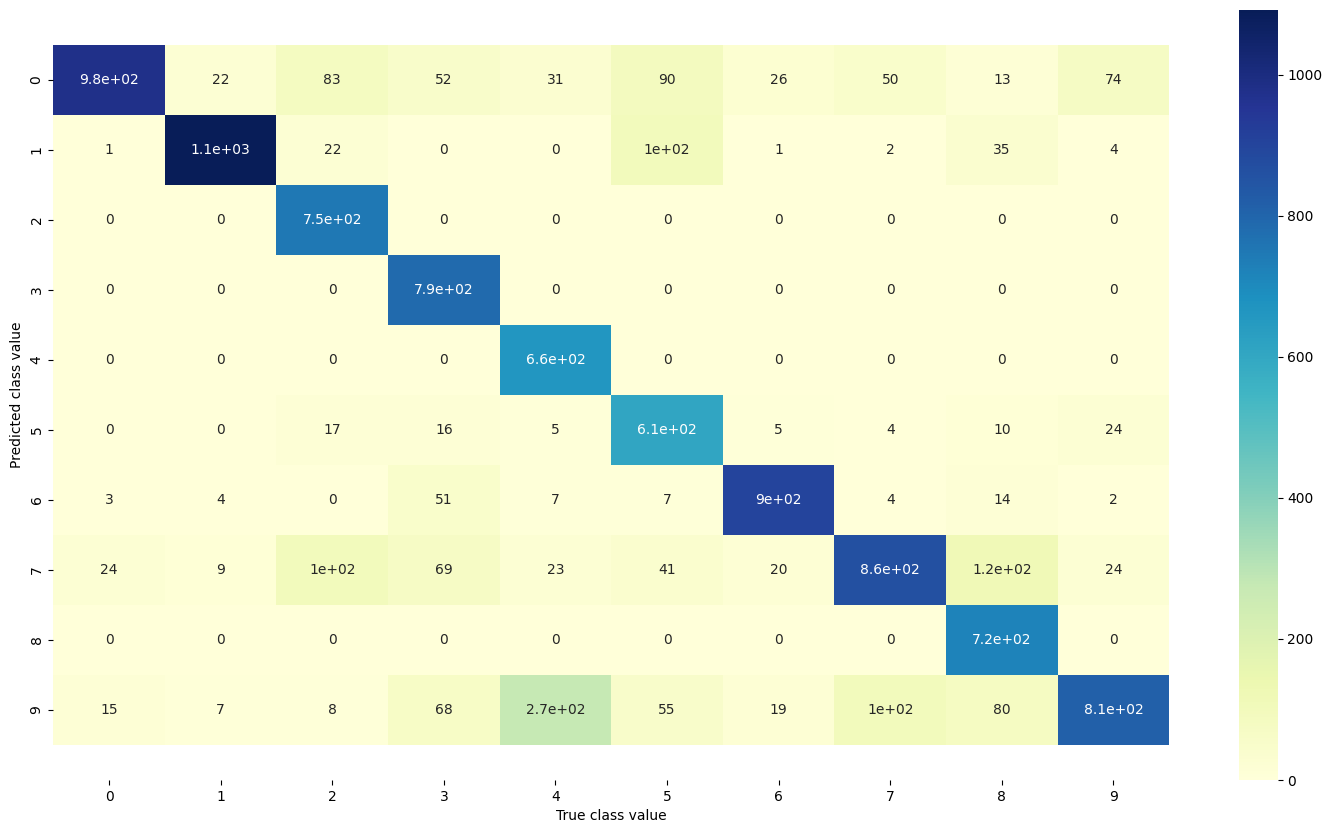

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import classification_report
from tqdm import tqdm
from time import time
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
data = np.zeros([70000, 784])
data[:60000, :] = x_train
data[60000:, :] = x_test
label = np.zeros(70000)
label[:60000] = y_train
label[60000:] = y_test

def naive_bayes(data, label):
    n_s, n_f = data.shape  # Find the Shape (Samples,Features) of the data
    classes = np.unique(label)  # Find the Unique Classes in the Data
    n_c = len(classes)  # Number of Classes in the Data
    total_data = np.zeros([n_s, n_f + 1])  # Create a Zero Matrix with (Samples,Feature+1) dimensions
    total_data[:, :-1] = data  # Save the samples & features in the total_data matrix
    total_data[:, -1] = label  # Save the Labels in the total_data matrix
    np.random.shuffle(total_data)  # Shuffle the total_data Matrix (Sample & Label) are sampled together
    trainX = total_data[:60000, :]  # Train Data is taken from total Data
    np.random.shuffle(trainX)  # Train Data is shuffled once again
    testX = total_data[60000:, :]  # Test Data is taken from Total Data
    np.random.shuffle(testX)  # Test Data is shuffled once again
    testX_c = testX[:, :-1]  # Take the samples and feature from Test Data
    testX_l = testX[:, -1]  # Take the labels from Test Data
    mean_v = np.zeros([n_c, n_f])  # Take a Zero Matrix that will be used to store the mean of Features wrt classes
    var_v = np.zeros([n_c, n_f])  # Take a Zero Matrix that will be used to store the variance of Features wrt classes
    c_prob = []  # list to store P(class)
    confusion_matrix = np.zeros([n_c, n_c])  # Take a Zero Matrix for Confusion MAtrix of size (classes*classes)
    d_acc = []  # Take a list that will save each class(digit) accuracy

    for c in classes:
        trainX_c = trainX[trainX[:, -1] == c]  # Filter samples for each class
        trainX_c = trainX_c[:, :-1]  #
        c_prob.append(len(trainX_c) / len(trainX))
        mean_v[int(c), :] = trainX_c.mean(axis=0)  # Find mean of each class & save in corresonding mean matrix
        var_v[int(c), :] = trainX_c.var(axis=0)  # Find variance of each class & save in corresonding mean matrix

    var_v = (var_v + 1000)  # Since variance is 0 for many pixels, we need to add some value to the variance.
    # Adding 1000 gives one of the best accuracies
    count = 0

    for i in range(testX.shape[0]):
        lists = ([])  # Empty list to store probability of all class for ith sample feature
        for j in range(n_c):
            numerator = np.exp(-((testX_c[i] - mean_v[j]) ** 2) / (2 * var_v[j]))
            denominator = np.sqrt(2 * np.pi * (var_v[j]))
            prob_xc = numerator / denominator
            ratio = np.sum(np.log(prob_xc))  # Probability of jth class for ith feature
            # We found that all classes have equal counts and P(c) for all class is equal provides better accuracy.
            # The line below can be uncommented to use the original formula
            # ratio=np.sum(np.log(prob_xc)+np.log(c_prob[j]))
            lists.append(ratio)  # Append Probability of jth class for ith feature

        pred = lists.index(max(lists))  # Take y predicted for the classthat has the maximum probability for jth feature vector
        if pred == testX_l[i]:
            count = count + 1  # If y_predicted equals true y label,count is incremented
            confusion_matrix[int(testX_l[i])][int(testX_l[i])] = (confusion_matrix[int(testX_l[i])][int(testX_l[i])] + 1)
            # Values in corresponding confusion matrix is appended
        else:
            for k in range(n_c):
                if pred == k:
                    confusion_matrix[int(testX_l[k])][int(testX_l[i])] = (confusion_matrix[int(testX_l[k])][int(testX_l[i])] + 1)
                    # Values in corresponding confusion matrix is appended
    for l in classes:
        check = testX[testX[:, -1] == l]  # Filter features for each class
        a = (confusion_matrix[int(l)][int(l)]) / check.shape[0]  # Find accuracy of each digit
        d_acc.append(a)  # Append individual digit accuracy

    o_acc = count / testX.shape[0]  # Find overall Accuracy
    return (d_acc, o_acc, confusion_matrix, mean_v, var_v)
    # Return (Digit Accuracy,Overall Accuracy,Confusion Matrix,Mean & Variance)


# Call Naive Bayes Function
(digit_accuracy, overall_accuracy, matrix, mean_v, var_v) = naive_bayes(data, label)
# Print All class Accuracy
digit = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
naive_df = pd.DataFrame(list(zip(digit, digit_accuracy)), columns=["Digit", "Digit Accuracy"])
print("Digit (Individual Class) Accuracy of the Samples:")
print(naive_df)

# Print Overall Accuracy
print("Overall Accuracy of Naive Bayes Model: " + str(overall_accuracy))

#Print Mean of each Class in 28*28 Form
plt.figure(figsize=(16, 8))
for i in range(mean_v.shape[0]):
    plt.subplot(2, 5, i + 1)
    img = mean_v[i].reshape(28, 28)
    plt.imshow(img, cmap="Greys")
    plt.xlabel('Image of digit '+ str(i) + ' Mean', fontsize = 12)
#Print Variance of each Class in 28*28 Form
plt.figure(figsize=(16,8))
for i in range(var_v.shape[0]):
    plt.subplot(2,5, i+1)
    img = var_v[i].reshape(28,28)
    plt.imshow(img, cmap="Greys")
    plt.xlabel('Image of digit '+ str(i) +' Variance', fontsize = 12)
    #Print Confusion Matrix
    
    
import seaborn as sns
plt.figure(figsize=(18,10))
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(matrix, annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('True class value')
plt.ylabel('Predicted class value')

# Part.1 - Analyzing and Preprocessing Datas
First we have to process our data which are in `data.pkl` and corresponding label is in `label.pkl`.

### Q1. Divide the data into two groups of train and test. explain their size ratio.
Dividing the data into training and testing sets is an important step in machine learning to evaluate the performance of a model on unseen data. A common ratio for splitting the data is 80:20 or 70:30, where the larger portion is used for training and the smaller portion is used for testing. In this case, I will use an 80:20 ratio, where 80% of the data will be used for training and 20% will be used for testing.
### Q2. Show image of some samples, what are the range of each pixel?
The images are grayscale, meaning that each pixel has a single intensity value ranging from 0 to 255. A pixel with a value of 0 represents black, while a pixel with a value of 255 represents white. The values in between represent different shades of gray.
### Q3. Since image sizes are not compatible them resize them to $20 \times 20$ pixels. Illustrate reasons to do so.
Resizing the images is not strictly necessary for training a Naive Bayes classifier, but it can be beneficial for several reasons.

First, resizing the images can reduce the computational complexity of the problem. Resizing the images to a smaller size, such as 20x20 pixels, reduces the number of parameters that need to be estimated, which can make the problem more tractable.

Second, resizing the images can improve the performance of the classifier. Naive Bayes classifiers assume that the features are independent and identically distributed (i.i.d.), which means that each pixel in the image is treated as a separate feature. However, neighboring pixels in an image are often highly correlated, which violates the i.i.d. assumption. Resizing the images can help to reduce the correlation between neighboring pixels, which can improve the performance of the classifier.

Finally, resizing the images can help to reduce the impact of small variations in the position or orientation of the digits. Resizing the images to a standard size can help to reduce the impact of these variations, which can make the classifier more robust to changes in the input.

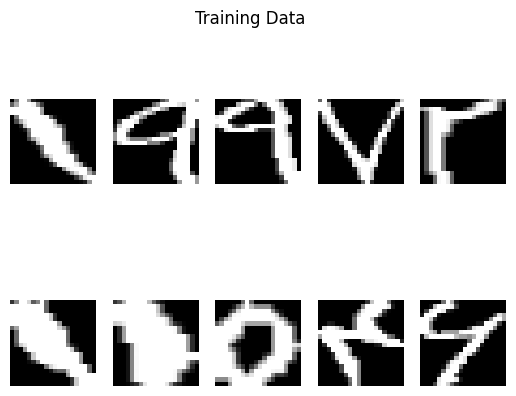

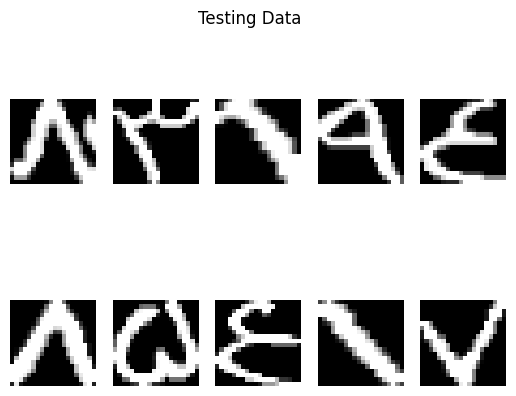

In [26]:
from __future__ import annotations
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from sklearn import datasets
from sklearn.metrics import classification_report
from tqdm import tqdm
from time import time

# Load data from data.pkl file
with open("./assets/data.pkl", "rb") as f:
    data = pickle.load(f)

# Load labels from label.pkl file
with open("./assets/label.pkl", "rb") as f:
    labels = pickle.load(f)

# Resize the images to 20x20 pixels
data_resized = [cv2.resize(img, (20, 20)) for img in data]

# Split the data into training and testing sets
num_samples = len(data_resized)
num_train = int(0.8 * num_samples)
indices = list(range(num_samples))
random.shuffle(indices)
train_indices = indices[:num_train]
test_indices = indices[num_train:]
train_data = [data_resized[i] for i in train_indices]
test_data = [data_resized[i] for i in test_indices]
train_labels = [labels[i] for i in train_indices]
test_labels = [labels[i] for i in test_indices]

# Display the selected training data using Matplotlib
num_samples = 10
samples = random.sample(train_data, num_samples)
for i, sample in enumerate(samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample, cmap="gray")
    plt.axis("off")
    
plt.suptitle("Training Data")
plt.show()

# Display the selected testing data using Matplotlib
num_samples = 10
samples = random.sample(test_data, num_samples)
for i, sample in enumerate(samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample, cmap="gray")
    plt.axis("off")
    
plt.suptitle("Testing Data")
plt.show()


### Q4. Show sample of each class.

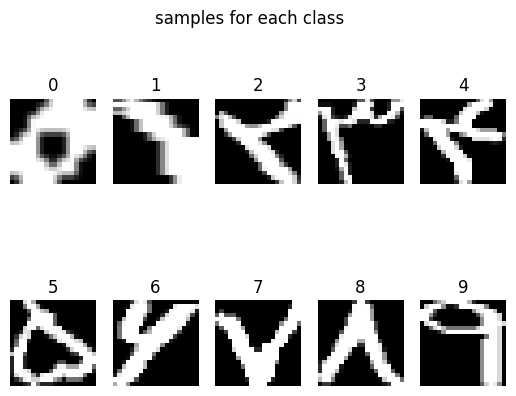

In [27]:
CLASSES = range(10)
for i in CLASSES:
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_data[train_labels.index(i)], cmap="gray")
    plt.axis("off")
    plt.title(f"{i}")
    
plt.suptitle("samples for each class")
plt.show()

### Q5. Count number of recurrence of each class and show bar graph.

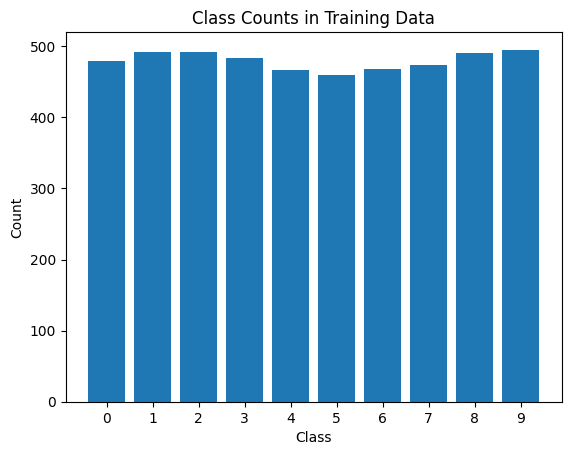

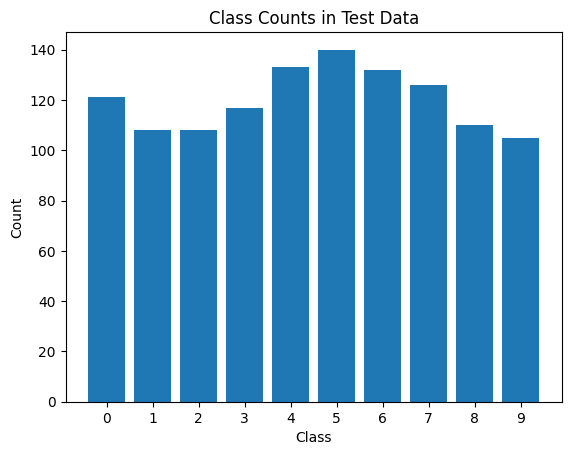

In [7]:
class_counts = np.zeros(10)
for label in train_labels:
    class_counts[label] += 1

# Plot a bar graph of the class counts
plt.bar(range(10), class_counts)
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Counts in Training Data")
plt.show()


class_counts = np.zeros(10)
for label in test_labels:
    class_counts[label] += 1

# Plot a bar graph of the class counts
plt.bar(range(10), class_counts)
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Counts in Test Data")
plt.show()

### Q6. Scale each pixel so it is between 0 and 1. What happens if you don't?
If we don't scale the pixel values to be between 0 and 1, several issues may arise:

1. Slow convergence: If the pixel values are not scaled, the optimization algorithm may take longer to converge to the optimal solution. This is because the scale of the pixel values can affect the step size of the optimization algorithm, and if the step size is too large or too small, the algorithm may not converge quickly.

2. Poor performance: If the pixel values are not scaled, the model may not perform as well as it could. This is because the scale of the pixel values can affect the importance of different features in the model. If some features have much larger values than others, they may dominate the model and make it difficult for the model to learn from the other features.

3. Numerical instability: If the pixel values are not scaled, numerical instability can occur. This is because the range of the pixel values can be very large, which can cause numerical overflow or underflow in the computations. This can lead to incorrect results or even crashes.

In summary, scaling the pixel values to be between 0 and 1 is an important preprocessing step that can help to avoid these issues and improve the performance of the model.

In [24]:
train_data = [[i / 255 for i in row] for row in train_data]
test_data = [[i / 255 for i in row] for row in test_data]

# Part.2 - Problem Solution Process
**Bayes' Theorem**  

$$ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $$
$$ P(c|X) = P(x_1|c) \times P(x_2|c) \times \ldots \times P(x_n|c) \times P(c) $$

- `[P(c|x)]` Posterior Probability:  
  The probability of **c** after observing **x**.  
  In this example, it is the probability of being in class (news label) **c** if it contains the word **x**.
- `[P(x|c)]` Likelihood:  
  The probability of **x** given **c**.  
  This is the probability of seeing word **x** in class **c**,  
  which is the number of **x** appearances in class **c** divided by the total words in class **c**.
- `[P(c)]` Class Prior Probability:  
  The probability of **c** without any given conditions (the probability of being in the **c** class by default)  
  This is the number of **c** classes divided by the total dataset entries.
- `[P(x)]` Evidence (Predictor Prior Probability):  
  The probability of **x** without any given conditions (the probability of word **x** appearing)  
  This is the count of word **x** in the dataset divided by the total word count.